Using matplotlib backend: inline
Step: 1, Action: 4, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 9}
Step: 2, Action: 4, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 8}
Step: 3, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 7}
Step: 4, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 6}
Step: 5, Action: 4, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 5}
Step: 6, Action: 5, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 4}
Step: 7, Action: 5, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 3}
Step: 8, Action: 4, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 2}
Step: 9, Action: 6, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 1}
Step: 10, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 0}
Total Reward: 42.0


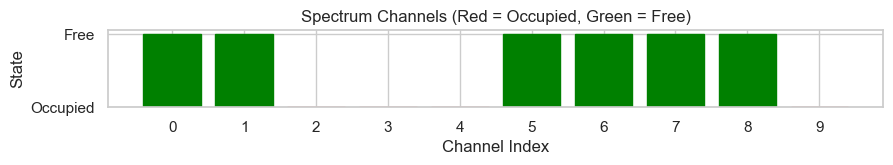

In [71]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        
        # Reward configuration
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        # Internal state variables
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        # Increment step count
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:  # Correct detection
            reward = self.reward_for_detection - self.energy_per_action
        else:  # Incorrect detection
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        # Info dictionary
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels in real-time.
        """
        plt.ion()  # Turn on interactive mode
        if not hasattr(self, 'fig'):  # Check if the plot is initialized
            self.fig, self.ax = plt.subplots(figsize=(10, 1))
            self.bar_container = self.ax.bar(range(self.num_channels), self.state, 
                                             color=['red' if x == 0 else 'green' for x in self.state])
            self.ax.set_title("Spectrum Channels (Red = Occupied, Green = Free)")
            self.ax.set_xlabel("Channel Index")
            self.ax.set_ylabel("State")
            self.ax.set_xticks(range(self.num_channels))
            self.ax.set_yticks([0, 1])
            self.ax.set_yticklabels(["Occupied", "Free"])
        else:
            for bar, value in zip(self.bar_container, self.state):
                bar.set_color('red' if value == 0 else 'green')
                bar.set_height(value)
        
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

%matplotlib auto
env = SpectrumEnv(num_channels=10, max_steps=10)

# Reset the environment
state = env.reset()
env.render()

total_reward = 0
while not env.done:
    # Random action selection
    action = np.random.randint(0, env.num_channels)
    state, reward, done, info = env.step(action)
    print(f"Step: {env.current_step}, Action: {action}, Reward: {reward}, Info: {info}")
    total_reward += reward
    env.render()

print(f"Total Reward: {total_reward}")
